In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

Data Cleaning

In [4]:
df1 = pd.read_csv("bengaluru_house_prices.csv")
df1.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
11772,Super built-up Area,18-Jun,Kundalahalli,3 BHK,Dieldli,1724,3.0,1.0,146.0
11437,Super built-up Area,Ready To Move,Whitefield,2 BHK,Pae 1ov,1190,2.0,1.0,70.0
6686,Super built-up Area,Ready To Move,High grounds,3 BHK,NaN,1900,2.0,2.0,190.0
4897,Built-up Area,18-May,Vijayabank bank layout,2 BHK,NaN,1100,2.0,1.0,48.0
2589,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NDionas,1300,2.0,2.0,73.0


In [33]:
df1['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [5]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df2 = df1.drop(['area_type','society','balcony','availability'], axis='columns')
df2.head(5)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\tinus\AppData\Local\Temp\ipykernel_13396\2222900254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [13]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [16]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [25]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [26]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [28]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(5)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [29]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [30]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [31]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


Feature Engineering

In [53]:
df5['location'].value_counts(ascending=True)

location
Abshot Layout                        1
Kanakadasa Layout                    1
Kengeri Satellite Town Stage II      1
Kasthuri Nagar East Of NGEF          1
Laxminarayana Layout                 1
                                  ... 
Thanisandra                        236
Kanakpura Road                     266
Electronic City                    304
Sarjapur  Road                     392
Whitefield                         535
Name: count, Length: 1293, dtype: int64

In [50]:
df5.location = df5.location.apply(lambda x: x.strip())

In [54]:
loc = df5.location.value_counts()
loc

location
Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: count, Length: 1293, dtype: int64

In [55]:
len(loc[loc<=10])

1052

In [56]:
location_stats_less_than_10 = loc[loc<=10]
location_stats_less_than_10

location
Naganathapura                     10
Sadashiva Nagar                   10
Nagappa Reddy Layout              10
BTM 1st Stage                     10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: count, Length: 1052, dtype: int64

In [57]:
len(df5.location.unique())

1293

In [59]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [62]:
df5.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
2540,Whitefield,2 BHK,1215.0,2.0,65.0,2,5349.794239
3590,Talaghattapura,3 BHK,1868.0,3.0,121.0,3,6477.516060
10224,1st Phase JP Nagar,2 BHK,1394.0,2.0,85.0,2,6097.560976
12747,Kanakpura Road,2 BHK,700.0,2.0,36.0,2,5142.857143
10869,Kundalahalli,2 BHK,1065.0,2.0,70.0,2,6572.769953
4372,other,2 BHK,1100.0,2.0,38.0,2,3454.545455
171,Attibele,1 BHK,450.0,1.0,11.0,1,2444.444444
8146,Sarjapur Road,5 Bedroom,1480.0,4.0,169.0,5,11418.918919
4274,KR Puram,2 BHK,1100.0,2.0,43.0,2,3909.090909
8259,Yelahanka,2 BHK,1115.0,2.0,60.0,2,5381.165919


Outlier Detection

In [64]:
len(df5[df5.total_sqft/df5.bhk<300])

744

In [65]:
df5.shape

(13246, 7)

In [67]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [68]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [69]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

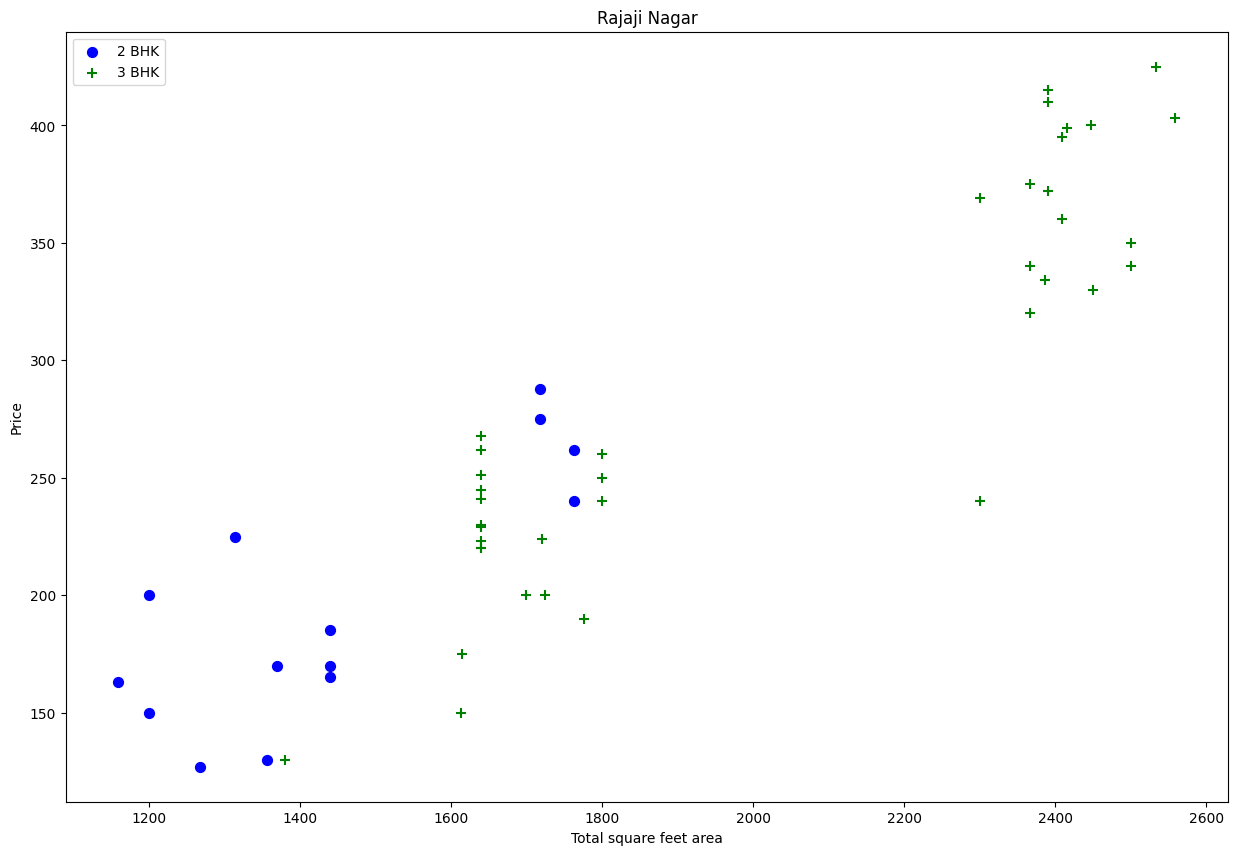

In [71]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color = 'blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color = 'green',label='3 BHK', s=50)
    plt.xlabel("Total square feet area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7,"Rajaji Nagar")